##**Submitting by Gurpreet Singh**

In [1]:
#  Install Alumentation latest version
!pip install -U albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


#**Load the files to variable 'images'**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import cv2
images = []
for filename in os.listdir("/content/drive/MyDrive/save_final_cancer_datasets/Sample_images/Data/images"):
  img = cv2.imread(os.path.join("/content/drive/MyDrive/save_final_cancer_datasets/Sample_images/Data/images",filename))
  if img is not None:
    images.append(img)


In [ ]:
len(images)

203

#**Sample images details**

(1053, 1872, 3)
1053
1872
3


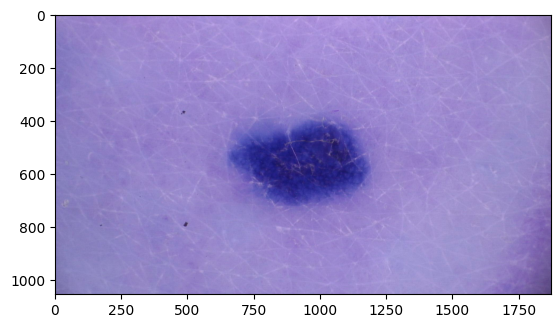

In [ ]:
import matplotlib.pyplot as plt

#Print Shape of the sample image
print(images[0].shape)

#Get the width, height and channel values from sample image
w,h,c=images[0].shape

# Print width, height and channel values of sample image
print(w)
print(h)
print(c)

#Show the sample image
plt.imshow(images[0])
plt.show()


#**Get the width, height and channel values for all images**

In [ ]:

#Initialize the empty array for height=h, width=w and channel=c
h=[]
w=[]
c=[]

for i in range(len(images)):
  x,y,z=images[i].shape
  w.append(x)
  h.append(y)
  c.append(z)


Image: 1


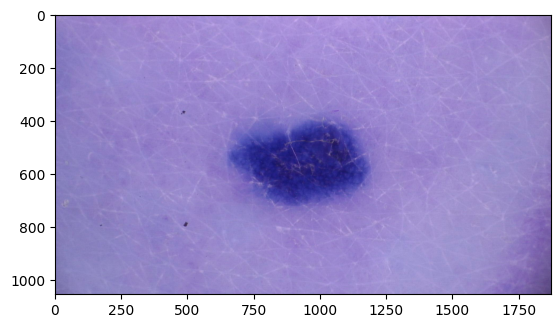

Image: 2


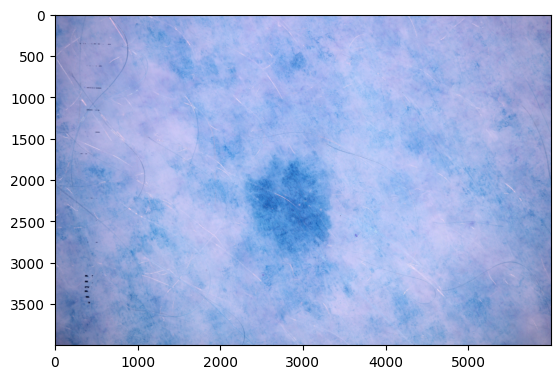

Image: 3


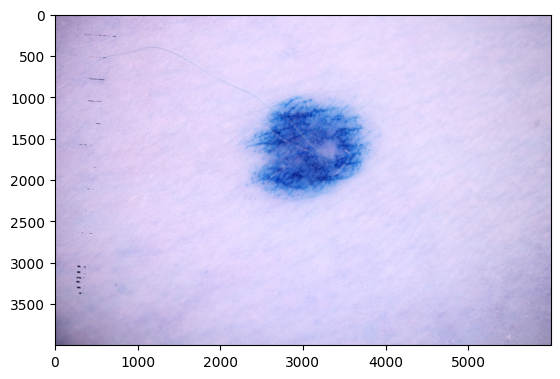

Image: 4


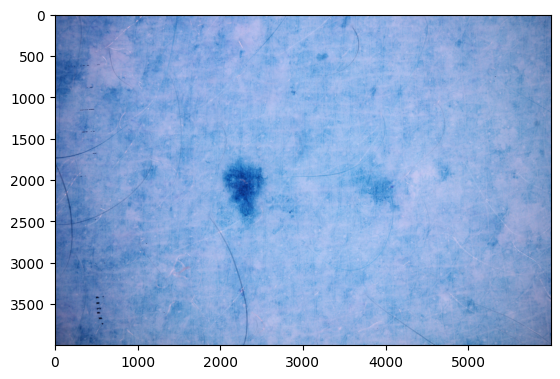

Image: 5


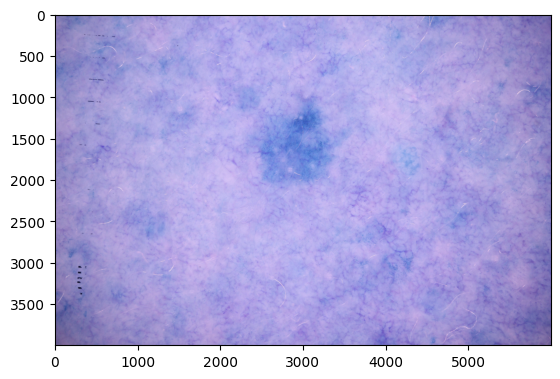

Image: 6


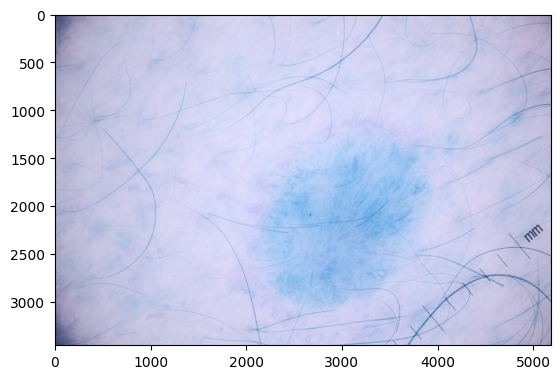

Image: 7


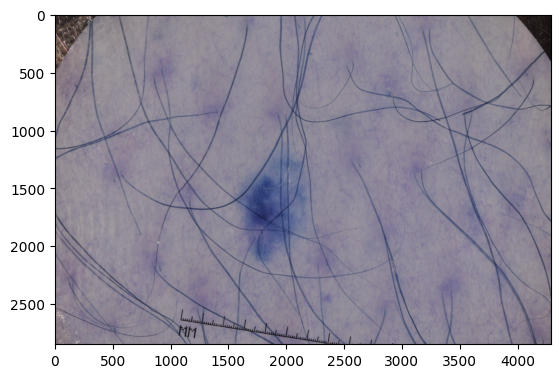

Image: 8


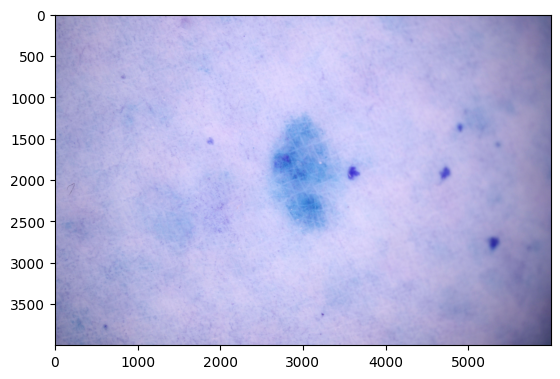

Image: 9


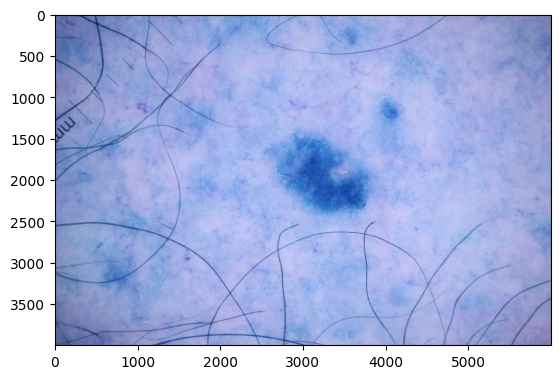

Image: 10


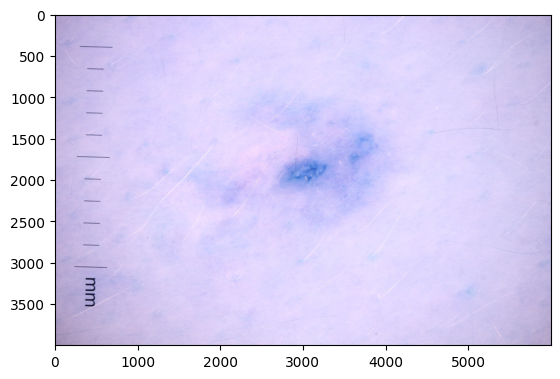

In [ ]:

for i in range(10):
  print("Image:",i+1)
  plt.imshow(images[i])
  plt.show()

#**Data Augmentations:**
##**Data Augumentation: With Blurs and Distorsions**

In [ ]:

import albumentations as A
transform = A.Compose([
                       A.Transpose(p=0.5),
                       A.VerticalFlip(p=0.5),
                       A.HorizontalFlip(p=0.5),
                       A.Rotate(p=0.5),
                       A.RandomBrightness(limit=0.2, p=0.5),
                       A.RandomContrast(limit=0.2, p=0.5),
                       A.OneOf([
                                A.MotionBlur(blur_limit=5, p=0.25),
                                A.MedianBlur(blur_limit=5, p=0.25),
                                A.GaussianBlur(blur_limit=5, p=0.25),
                                A.GaussNoise(var_limit=(5.0, 30.0), p=0.25)
                       ]),
                       A.OneOf([
                                A.OpticalDistortion(distort_limit=1.0, p=0.25),
                                A.GridDistortion(num_steps=5, distort_limit=1., p=0.25),
                                A.ElasticTransform(alpha=3, p=0.25)
                       ]),
                       A.CLAHE(clip_limit=4.0, p=0.7),
                       A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),
                       A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, border_mode=0, p=0.85),
                       A.Resize(width=722, height=542, p=0.5),
                       A.Normalize(max_pixel_value=25.0,p=0.5),
                       A.Cutout(max_h_size=int(h[i]*0.1), max_w_size=int(w[i]*0.1), num_holes=8, p=0.7)
                       ])


/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1284: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/blur/transforms.py:184: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


#**Data Augumentation: Without Blurs and Distorsions**

In [ ]:

transform1 = A.Compose([
                        A.Transpose(p=0.5),
                        A.Flip(p=0.5),
                        A.OneOf([
                                 A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3),
                                 A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1)
                                 ],p=1),
                        A.GaussianBlur(p=0.05),
                        A.HueSaturationValue(p=0.5),
                        A.RGBShift(p=0.5),
                        ])

#**Augmentation of first 50 images images with the 2 augmentations**

Sample Image 1:


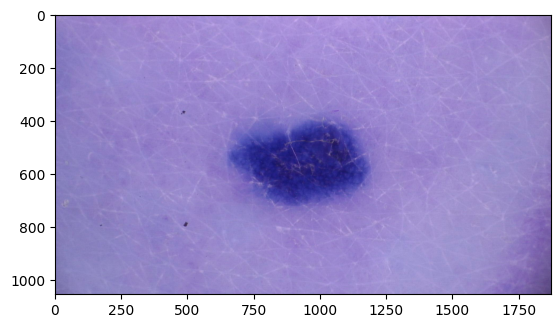

Augmentated Image with Blur and distorsion 1:


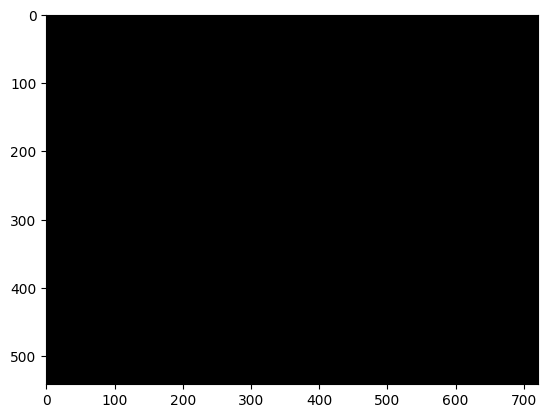

Augmentated Image without Blur and distorsion 1:


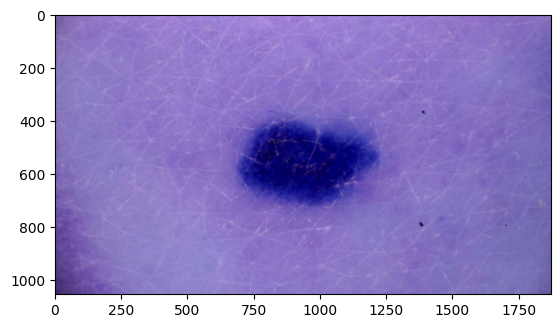

Sample Image 2:


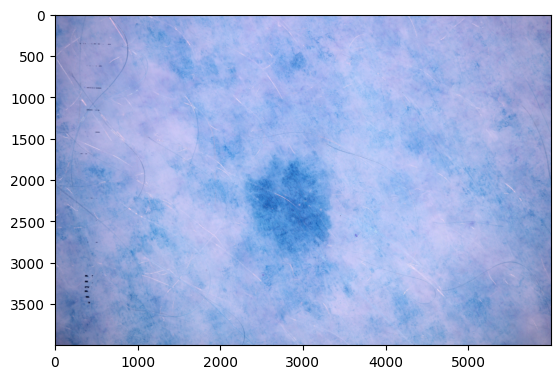

Augmentated Image with Blur and distorsion 2:


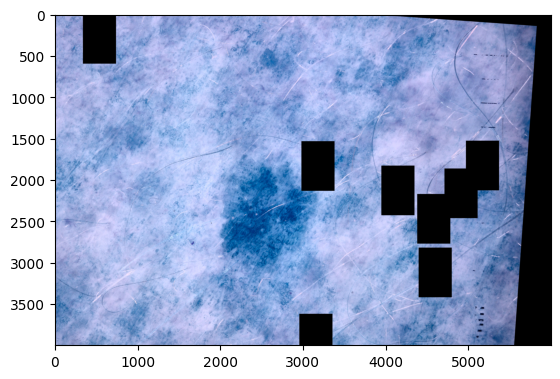

Augmentated Image without Blur and distorsion 2:


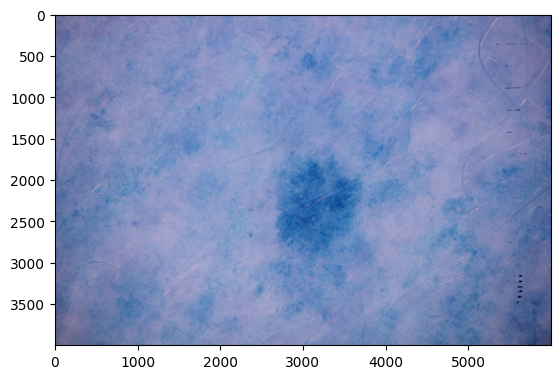

Sample Image 3:


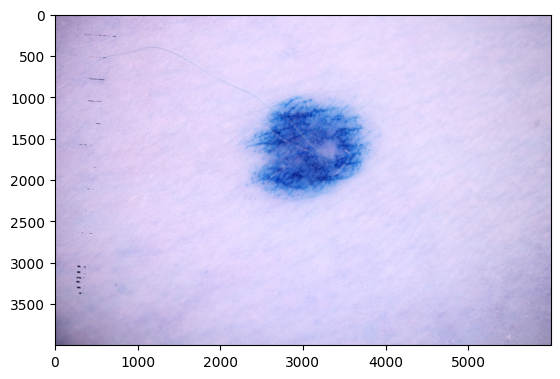

Augmentated Image with Blur and distorsion 3:


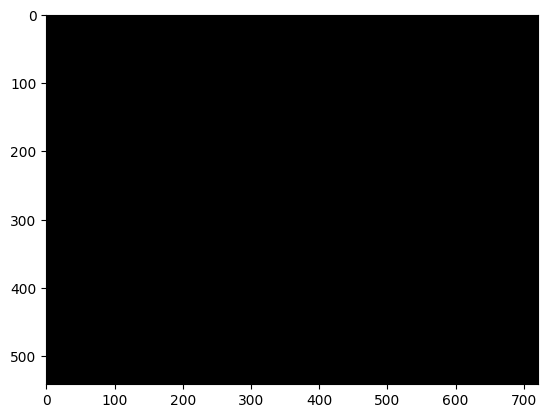

Augmentated Image without Blur and distorsion 3:


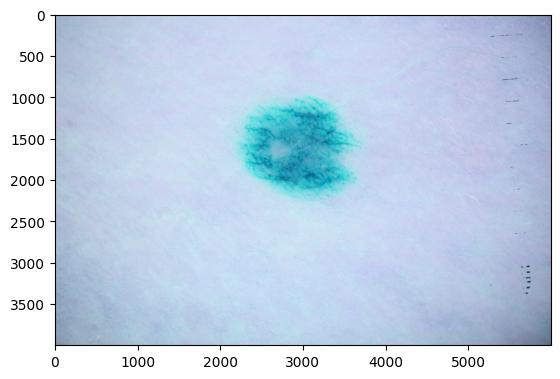

Sample Image 4:


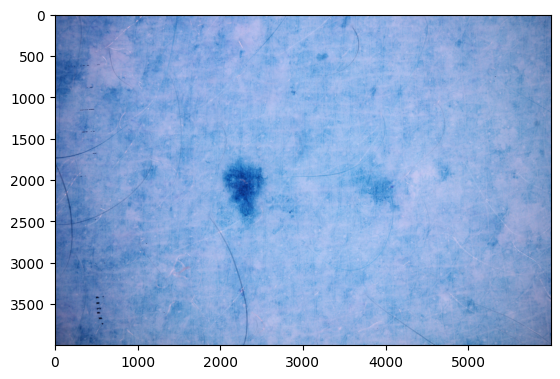

Augmentated Image with Blur and distorsion 4:


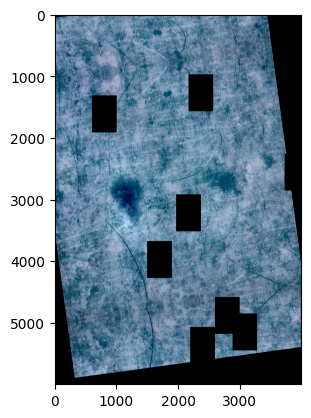

Augmentated Image without Blur and distorsion 4:


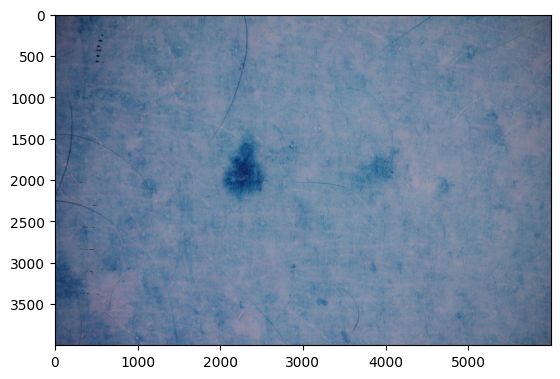

Sample Image 5:


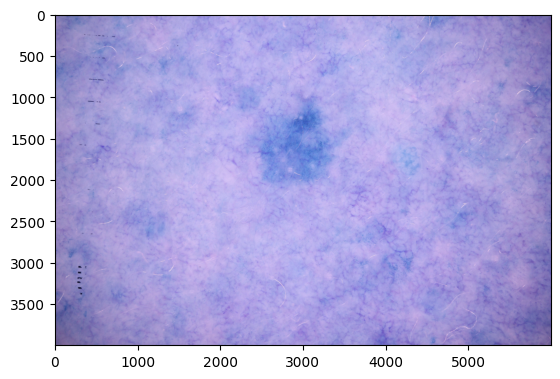

Augmentated Image with Blur and distorsion 5:


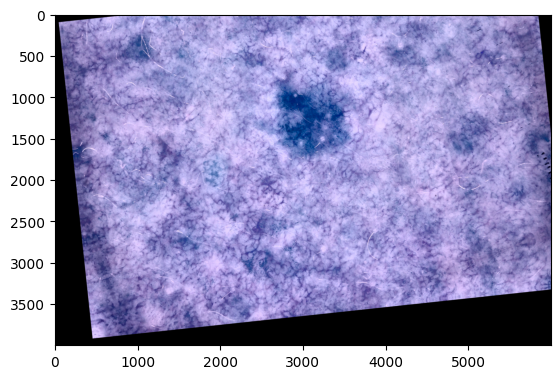

Augmentated Image without Blur and distorsion 5:


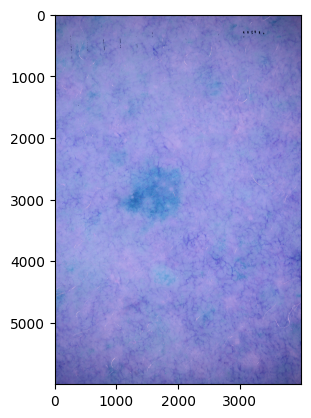

In [ ]:
import matplotlib.pyplot as plt
for i in range(5):
  #with Blur and distorsion
  transformed = transform(image=images[i])
  transformed_image = transformed["image"]

  #without Blur and distorsion
  transformed1 = transform1(image=images[i])
  transformed_image1 = transformed1["image"]

  print('Sample Image {}:'.format(i+1))
  plt.imshow(images[i])
  plt.show()

  print('Augmentated Image with Blur and distorsion {}:'.format(i+1))
  plt.imshow(transformed_image)
  plt.show()

  print('Augmentated Image without Blur and distorsion {}:'.format(i+1))
  plt.imshow(transformed_image1)
  plt.show()